In [5]:
import pandas as pd
import seaborn as sns
from glob import glob
import json

In [6]:
file_path_list = sorted(glob('/data/project/vllm/benchmarks/benchmark_output/*.json'))

result_dict_list = []
for file_path in file_path_list:
    print(file_path)
    # df = pd.read_json(file_path, orient='records')
    with open(file_path, "r", encoding='UTF-8-sig') as st_json:
        data = json.load(st_json)
        df = pd.DataFrame(data)
        result_dict = df.iloc[0][['duration','request_throughput','input_throughput','output_throughput','median_ttft_ms','median_tpot_ms','mean_itl_ms', 'total_input_tokens','total_output_tokens',]].to_dict()
        # result_dict['median_ttft']= df['ttfts'].median()
        # result_dict['median_itl'] = df['itls'].apply(lambda x: sum(x)/len(x)).median()
        result_dict['model_name'] ='-'.join(file_path.split('/')[-1].split('-')[2:5])
        result_dict_list.append(result_dict)


/data/project/vllm/benchmarks/benchmark_output/vllm-infqps-EXAONE-3.0-7.8B-Instruct-20240827-094516.json
/data/project/vllm/benchmarks/benchmark_output/vllm-infqps-Llama-2-13b-chat-hf-20240827-094445.json


/data/project/vllm/benchmarks/benchmark_output/vllm-infqps-Llama-2-7b-chat-hf-20240827-075720.json
/data/project/vllm/benchmarks/benchmark_output/vllm-infqps-Meta-Llama-3.1-8B-Instruct-20240827-075535.json
/data/project/vllm/benchmarks/benchmark_output/vllm-infqps-Mistral-7B-Instruct-v0.3-20240827-062246.json
/data/project/vllm/benchmarks/benchmark_output/vllm-infqps-Mistral-Nemo-Instruct-2407-20240827-062335.json
/data/project/vllm/benchmarks/benchmark_output/vllm-infqps-Phi-3.5-mini-instruct-20240827-093951.json
/data/project/vllm/benchmarks/benchmark_output/vllm-infqps-Qwen1.5-1.8B-20240827-054041.json
/data/project/vllm/benchmarks/benchmark_output/vllm-infqps-Qwen1.5-MoE-A2.7B-Chat-20240827-084950.json
/data/project/vllm/benchmarks/benchmark_output/vllm-infqps-Qwen2-0.5B-Instruct-20240827-054253.json
/data/project/vllm/benchmarks/benchmark_output/vllm-infqps-Qwen2-1.5B-Instruct-20240827-055003.json
/data/project/vllm/benchmarks/benchmark_output/vllm-infqps-Qwen2-7B-Instruct-2024082

In [7]:
df.iloc[0]

date                                                     20240827-123423
backend                                                             vllm
model_id               /data/project/EXAONE_v3.0/model_2.4B_4k_beta_2...
tokenizer_id           /data/project/EXAONE_v3.0/model_2.4B_4k_beta_2...
best_of                                                                1
use_beam_search                                                    False
num_prompts                                                         1000
request_rate                                                         inf
duration                                                      123.050933
completed                                                           1000
total_input_tokens                                                 22963
total_output_tokens                                               323750
request_throughput                                              8.126716
input_throughput                                   

In [8]:
pd.options.display.float_format = '{:.2f}'.format
result_df = pd.DataFrame(result_dict_list)
result_df

,duration,request_throughput,input_throughput,output_throughput,median_ttft_ms,median_tpot_ms,mean_itl_ms,total_input_tokens,total_output_tokens,model_name
0,145.98,6.85,152.58,2486.10,66172.09,37.06,36.97,22274,362928,EXAONE-3.0-7.8B
1,690.63,1.45,84.78,775.33,278831.80,59.31,76.67,58550,535469,Llama-2-13b
2,281.33,3.55,208.12,1849.46,116835.66,49.87,54.84,58550,520306,Llama-2-7b
3,172.40,5.80,152.19,2338.18,77569.37,39.43,40.30,26238,403102,Meta-Llama-3.1
4,247.68,4.04,178.49,2400.79,102576.83,39.12,42.06,44209,594635,Mistral-7B-Instruct
5,155.66,6.42,161.30,1686.44,55998.55,53.06,52.27,25108,262505,Mistral-Nemo-Instruct
6,470.27,2.13,122.67,1969.35,205656.75,48.75,69.48,57686,926118,Phi-3.5-mini
7,143.90,6.95,192.32,2623.34,64905.15,37.16,37.71,27674,377490,Qwen1.5-1.8B-20240827
8,184.02,5.43,150.38,1819.59,75277.33,51.04,52.77,27674,334846,Qwen1.5-MoE-A2.7B
9,158.07,6.33,175.07,2621.30,71041.87,37.47,38.11,27674,414360,Qwen2-0.5B-Instruct


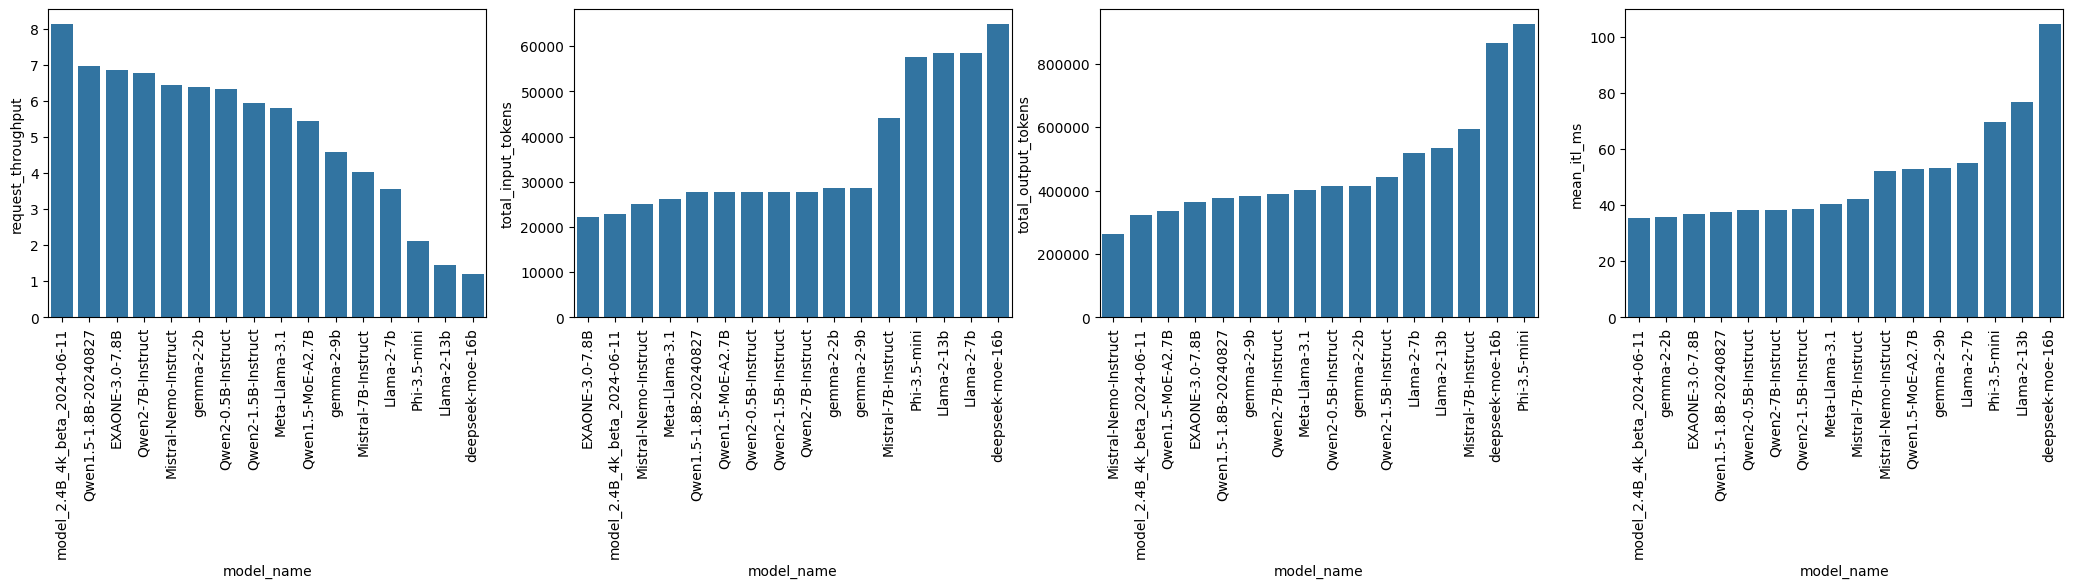

: 

In [11]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

plt.figure(figsize=(26,4))
plt.subplot(1,4,1)
g = sns.barplot(data=result_df.sort_values(by='request_throughput', ascending=False),  x='model_name', y='request_throughput')
# g.set_xlabel('max_num_seqs')
plt.xticks(rotation=90)

plt.subplot(1,4,2)
g = sns.barplot(data=result_df.sort_values(by='total_input_tokens'),  x='model_name', y='total_input_tokens')
# g.set_xlabel('max_num_seqs')/
plt.xticks(rotation=90)

plt.subplot(1,4,3)
g = sns.barplot(data=result_df.sort_values(by='total_output_tokens'),  x='model_name', y='total_output_tokens')
# g.set_xlabel('max_num_seqs')
plt.xticks(rotation=90)

plt.subplot(1,4,4)
g = sns.barplot(data=result_df.sort_values(by='mean_itl_ms'),  x='model_name', y='mean_itl_ms')
# g.set_xlabel('max_num_seqs')

# sns.set_axis
# g.set_xticks(range(35, 37),labels=[35,36])
# g.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}')) 
plt.xticks(rotation=90)
plt.show()